# **DDoS attacks data analysis based on RDF-SVM**
AUTHOR: Yasaswi Kolasani


Import Dataset

In [9]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

dataset = pd.read_csv('/content/drive/My Drive/DDoS/kdd.csv')

In [10]:
dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal


Check for duplicates

In [11]:
mat = np.array([tuple(row) for row in dataset.to_numpy()])
unique_rows, counts = np.unique(mat, axis=0, return_counts=True)
for i in range(len(unique_rows)):
    if counts[i] > 1:
        print(f"Row {unique_rows[i]} is repeated {counts[i]} times.")

Streaming output truncated to the last 5000 lines.
 'normal'] is repeated 2 times.
Row ['0' 'udp' 'domain_u' 'SF' '42' '42' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '4' '6' '0.0' '0.0' '0.0' '0.0' '1.0' '0.0'
 '0.33' '255' '250' '0.98' '0.01' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 'normal'] is repeated 2 times.
Row ['0' 'udp' 'domain_u' 'SF' '42' '42' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '4' '6' '0.0' '0.0' '0.0' '0.0' '1.0' '0.0'
 '0.33' '255' '250' '0.98' '0.01' '0.01' '0.0' '0.0' '0.0' '0.0' '0.0'
 'normal'] is repeated 2 times.
Row ['0' 'udp' 'domain_u' 'SF' '42' '42' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '4' '6' '0.0' '0.0' '0.0' '0.0' '1.0' '0.0'
 '0.33' '255' '255' '1.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0' '0.0'
 'normal'] is repeated 5 times.
Row ['0' 'udp' 'domain_u' 'SF' '42' '42' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '4' '7' '0.0' '0.0' '0.0' '0.0' '1.0' '0.0'
 '0.29' '255

# **Drop Duplicates**

In [12]:
len(counts)

145585

In [13]:
dataset.drop_duplicates(subset=None,keep='first',inplace=True)
x=dataset.drop(columns=list(dataset.columns)[-1])
y=dataset[list(dataset.columns)[-1]]

In [14]:
y.value_counts()

label
normal             87831
neptune            51820
back                 968
teardrop             918
satan                906
warezclient          893
ipsweep              651
smurf                641
portsweep            416
pod                  206
nmap                 158
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  19
imap                  12
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

In [15]:
y[y != "normal"] = "anomaly"

In [16]:
y.value_counts()

label
normal     87831
anomaly    57754
Name: count, dtype: int64

In [17]:
x.shape

(145585, 41)

# **Validate Data**

In [18]:
for i in x.columns:
  print("-------------------------")
  print(x[i].value_counts())


-------------------------
duration
0        134974
1          2441
2           853
3           604
5           407
          ...  
1877          1
6186          1
4262          1
18185         1
120           1
Name: count, Length: 2495, dtype: int64
-------------------------
protocol_type
tcp     130912
udp      12267
icmp      2406
Name: count, dtype: int64
-------------------------
service
http        62053
private     49057
smtp         9721
domain_u     5425
other        4769
            ...  
X11            11
tim_i           5
pm_dump         1
tftp_u          1
red_i           1
Name: count, Length: 66, dtype: int64
-------------------------
flag
SF        87458
S0        42278
REJ       14712
RSTO        569
RSTR        425
S1           57
SH           34
S2           24
RSTOS0       11
S3           10
OTH           7
Name: count, dtype: int64
-------------------------
src_bytes
0        57872
147       1962
105       1467
146       1454
42         941
         ...  
6927     

In [19]:
x.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
lnum_compromised               0
lroot_shell                    0
lsu_attempted                  0
lnum_root                      0
lnum_file_creations            0
lnum_shells                    0
lnum_access_files              0
lnum_outbound_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

# **Change categorical data to numerical**

In [20]:
x["protocol_type"].value_counts() # because of minimal elements, we can use onehotencoder

protocol_type
tcp     130912
udp      12267
icmp      2406
Name: count, dtype: int64

In [21]:
protocol_data = pd.get_dummies(x["protocol_type"],drop_first = True)
x.drop("protocol_type", axis = 1, inplace=True)
x = pd.concat([x, protocol_data], axis=1)
# we can remove the columns lnum_outbound_cmds, is_host_login because these contains only zeros.
x.drop("is_host_login", axis = 1, inplace=True)
x.drop("lnum_outbound_cmds", axis = 1, inplace=True)

In [22]:
le= preprocessing.LabelEncoder()
x['service']=le.fit_transform(x['service']) # we have 66 unique values in service column, so we choose label encoder, instead of onehot encoding
x['flag']=le.fit_transform(x['flag']) # we have 11 unique values in flag column, so we choose label encoder, instead of onehot encoding
# y=le.fit_transform(y)

<Axes: >

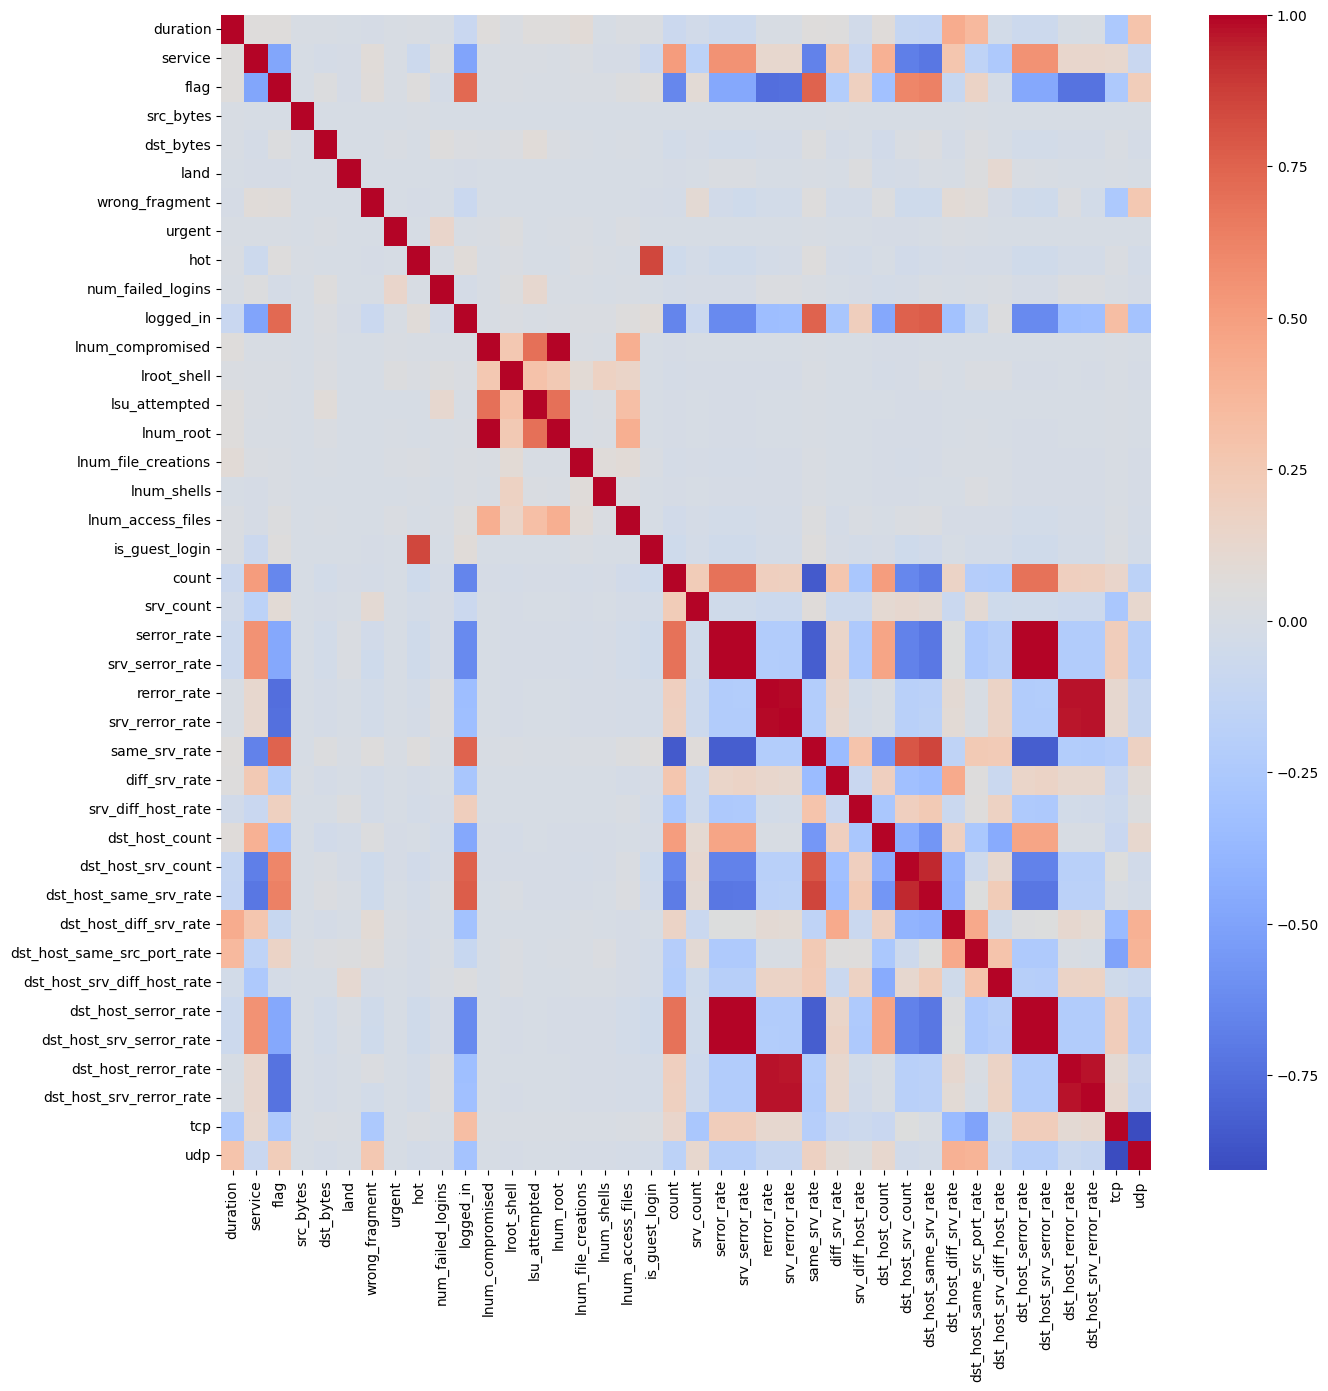

In [23]:
plt.figure(figsize=(15, 15))
sns.heatmap(x.corr(), cmap='coolwarm')

# **Remove columns with multi collinearity**

<Axes: >

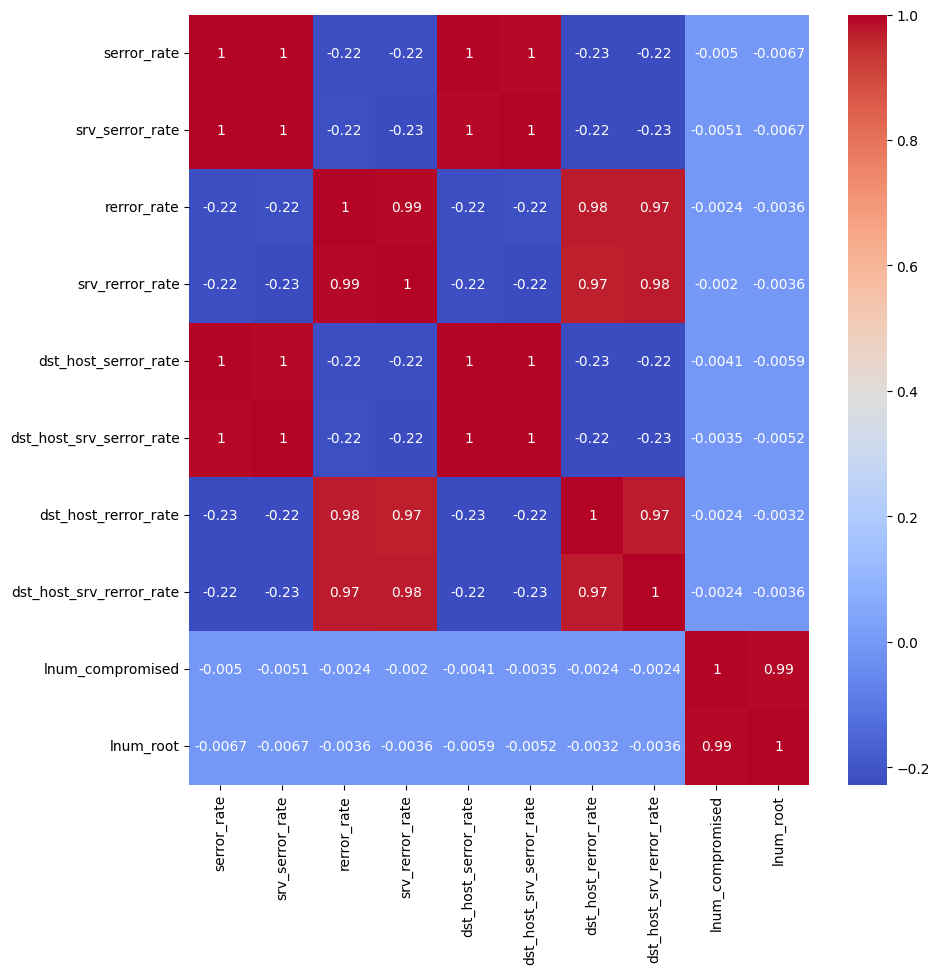

In [24]:
plt.figure(figsize=(10, 10))
subset_columns = ['serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','lnum_compromised', 'lnum_root']
sns.heatmap(x[subset_columns].corr(), annot=True, cmap='coolwarm')
# dst_host_srv_serror_rate
# serror_rate
# dst_host_srv_rerror_rate
# dst_host_serror_rate
# dst_host_rerror_rate
# rerror_rate
# lnum_compromised

In [25]:
# we can clerly remove column either dst_host_serror_rate or srv_serror_rate
x.drop("dst_host_srv_serror_rate", axis = 1, inplace=True)
x.drop("serror_rate", axis = 1, inplace=True)
x.drop("dst_host_srv_rerror_rate", axis = 1, inplace=True)
x.drop("dst_host_serror_rate", axis = 1, inplace=True)
x.drop("dst_host_rerror_rate", axis = 1, inplace=True)
x.drop("rerror_rate", axis = 1, inplace=True)
x.drop("lnum_compromised", axis = 1, inplace=True)

<Axes: >

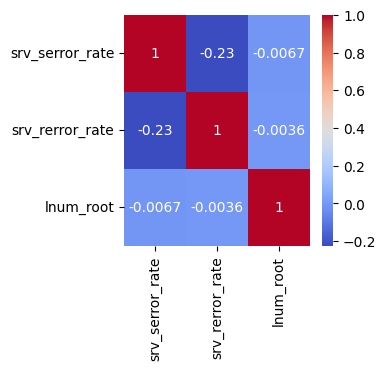

In [26]:
plt.figure(figsize=(3, 3))
subset_columns = ['srv_serror_rate','srv_rerror_rate','lnum_root']
sns.heatmap(x[subset_columns].corr(), annot=True, cmap='coolwarm')

<Axes: >

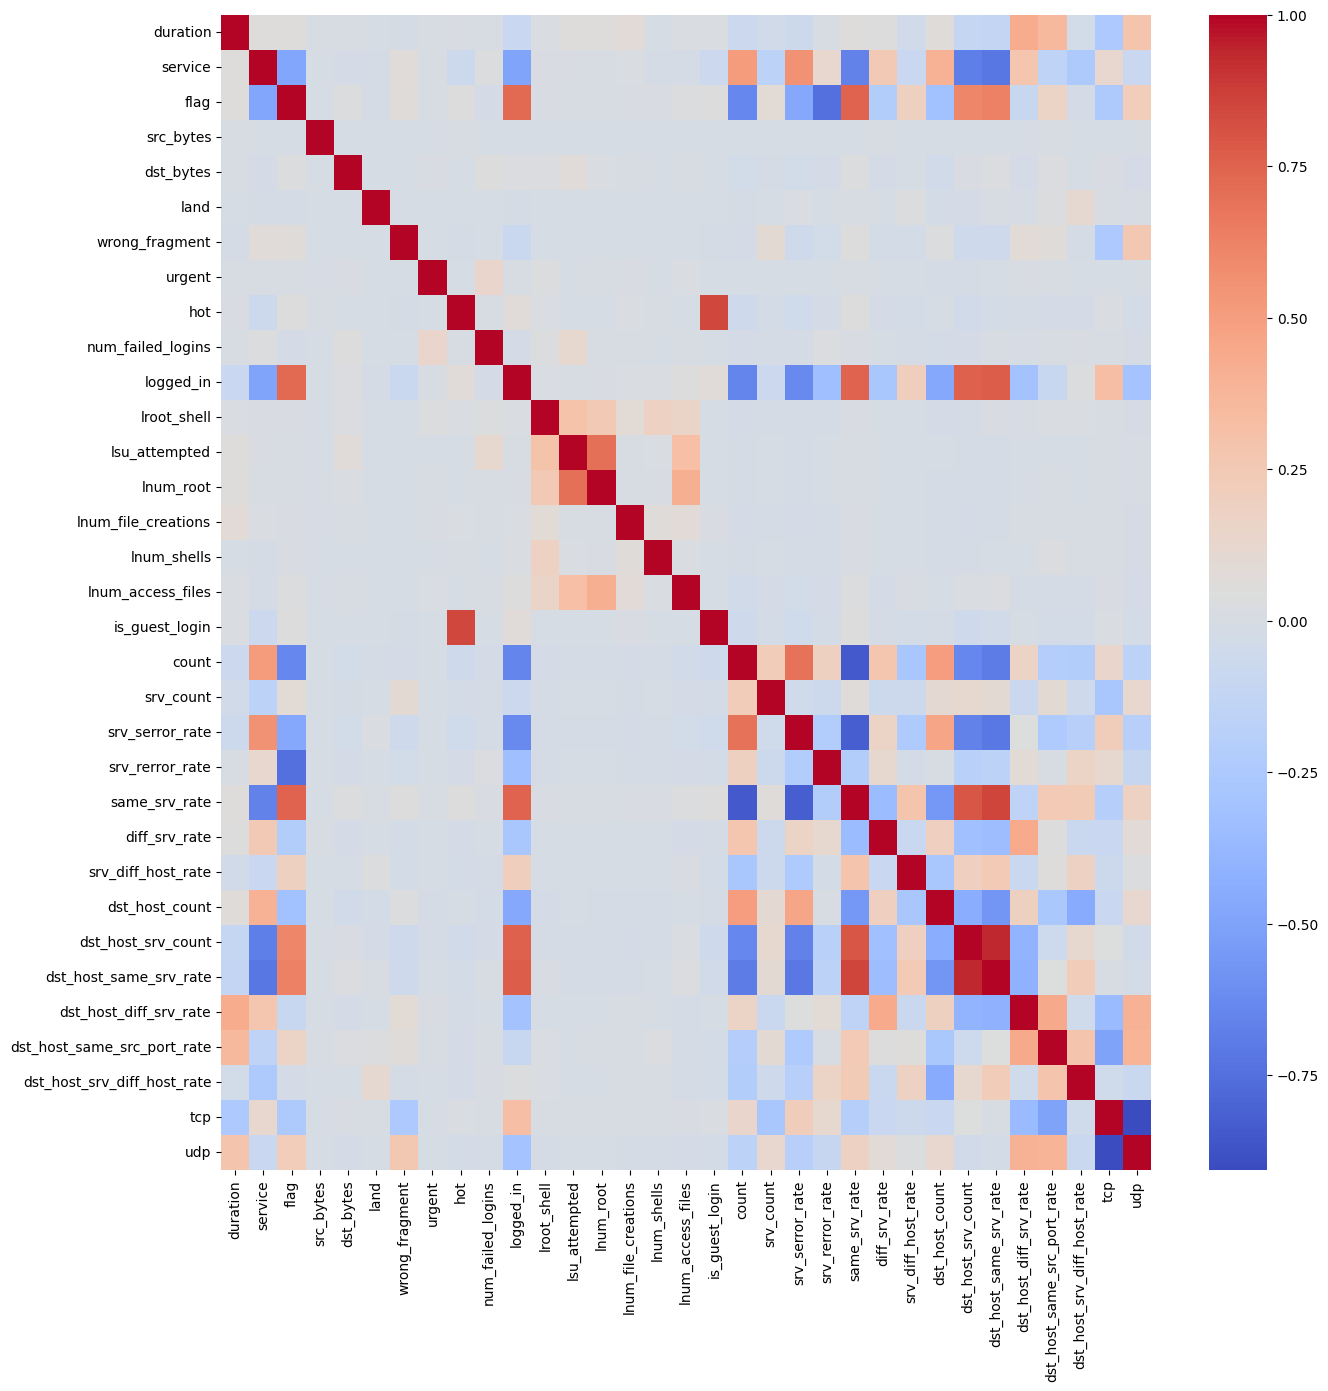

In [27]:
plt.figure(figsize=(15, 15))
sns.heatmap(x.corr(), cmap='coolwarm')

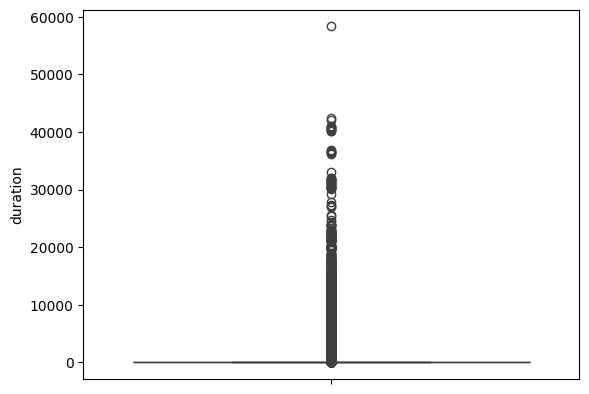

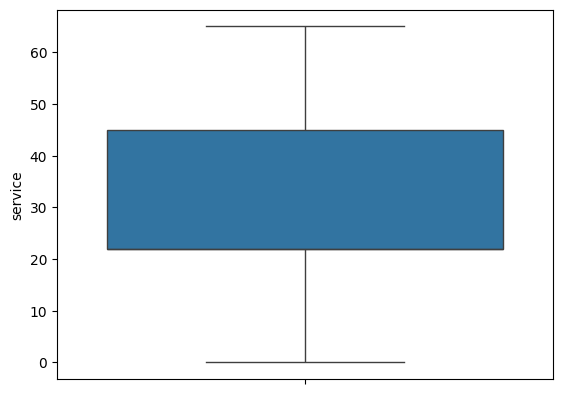

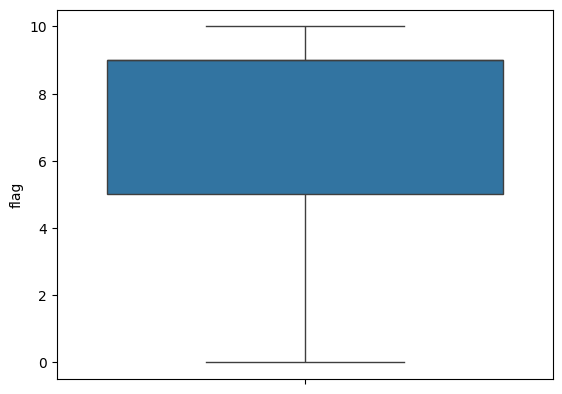

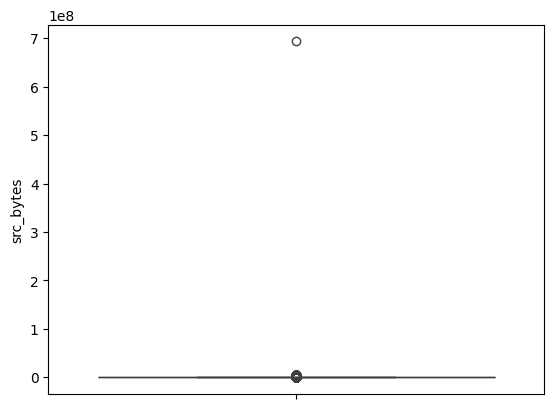

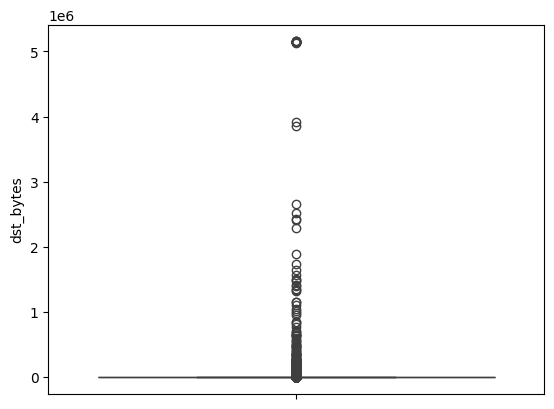

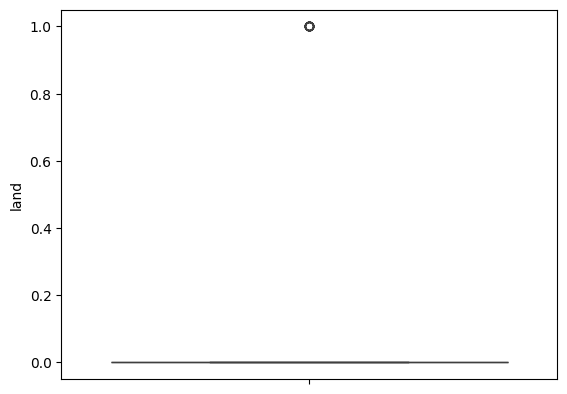

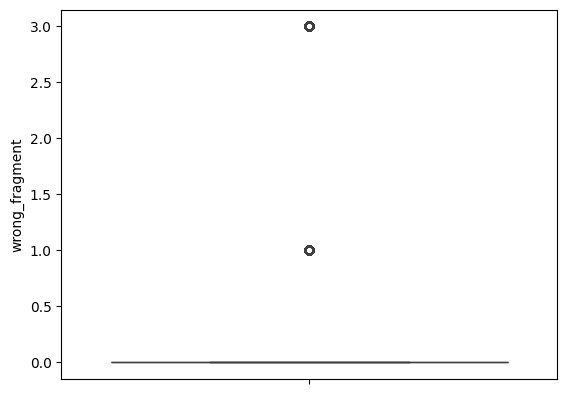

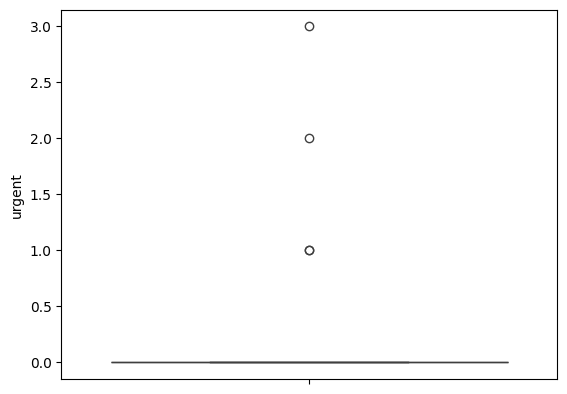

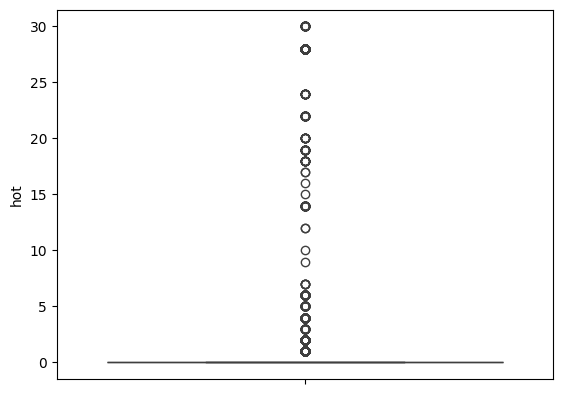

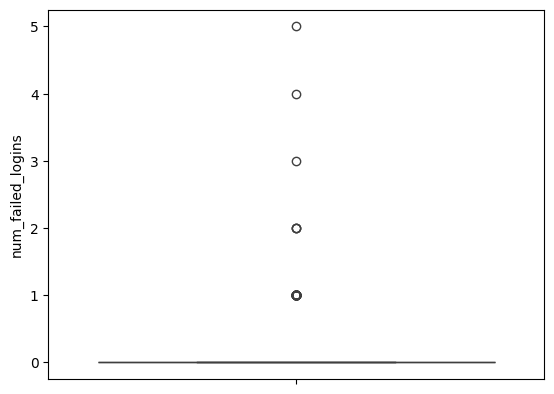

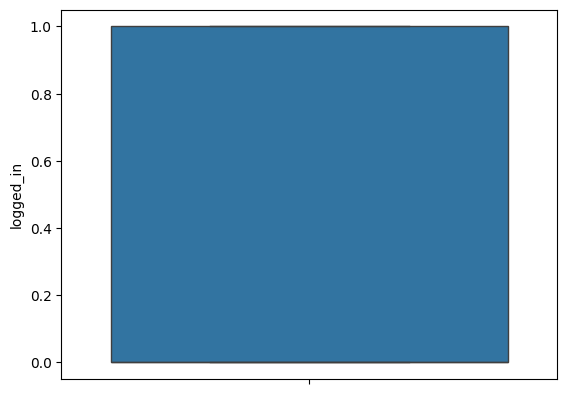

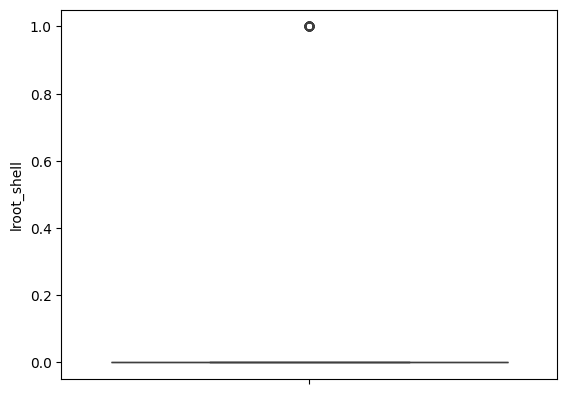

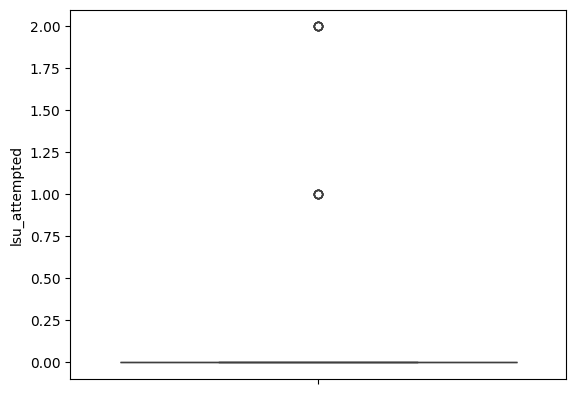

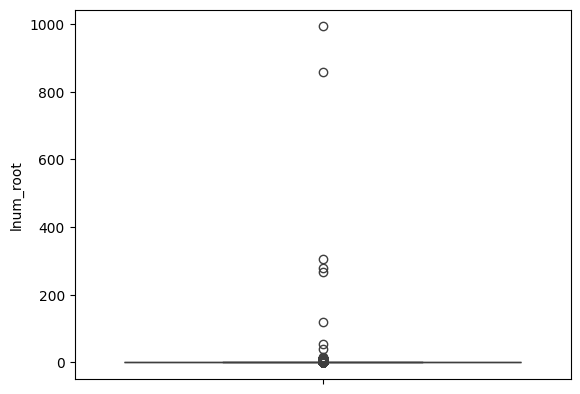

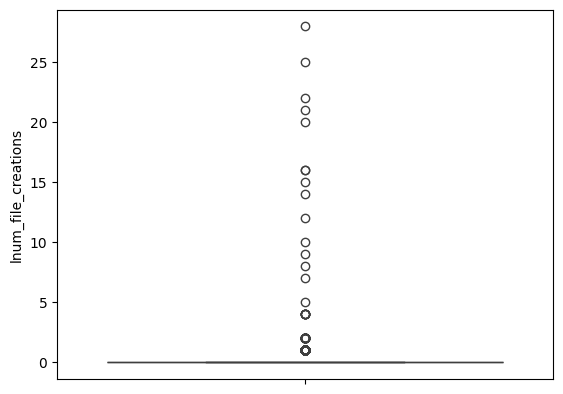

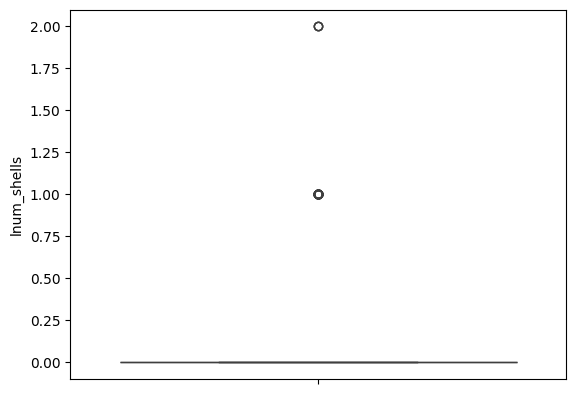

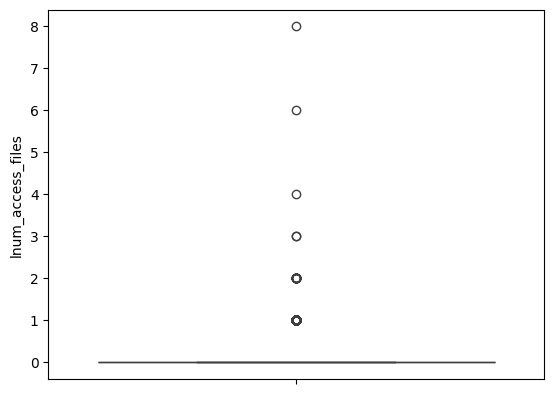

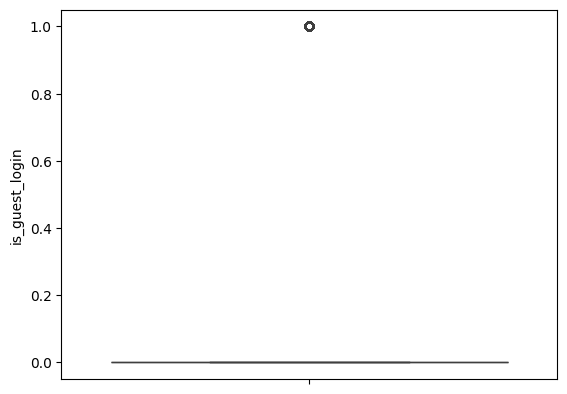

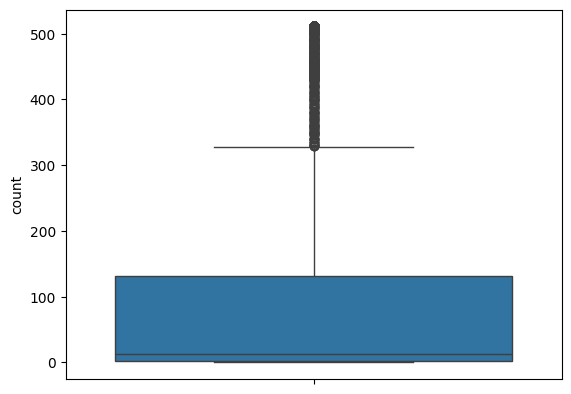

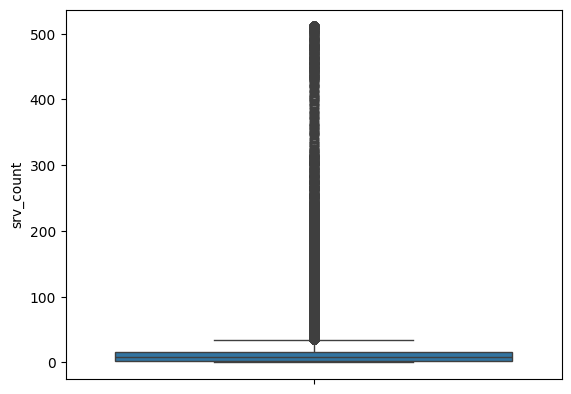

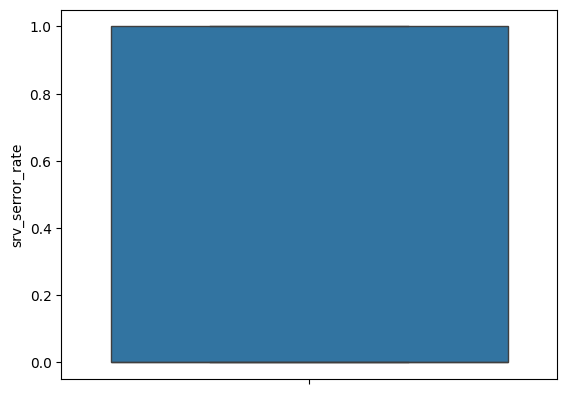

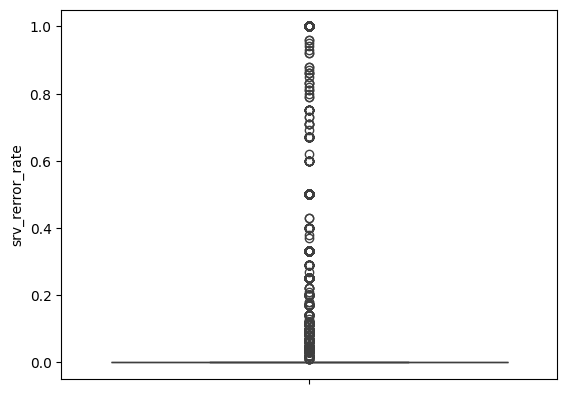

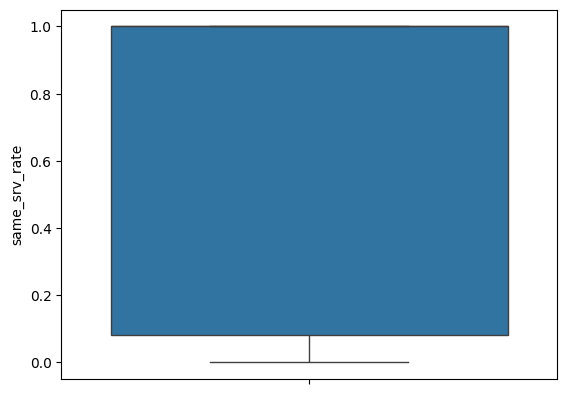

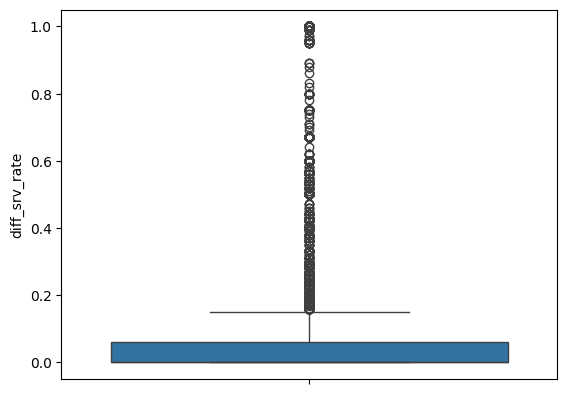

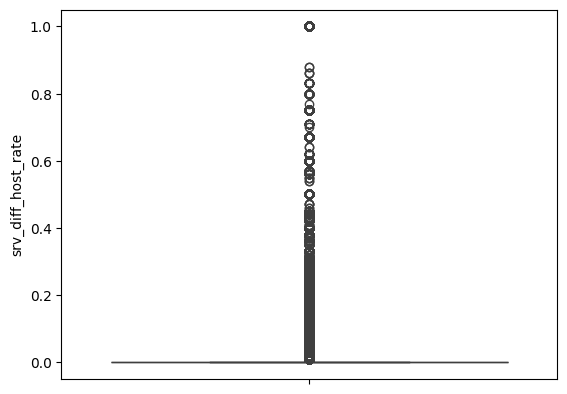

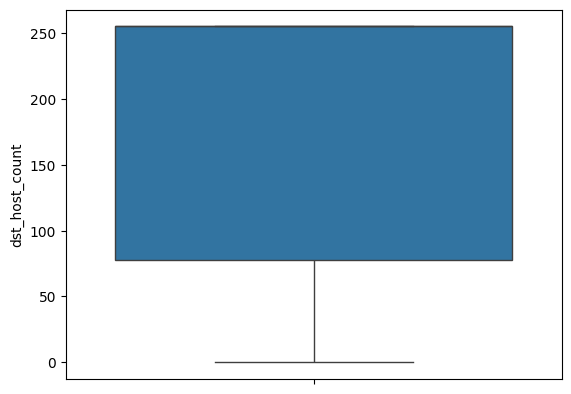

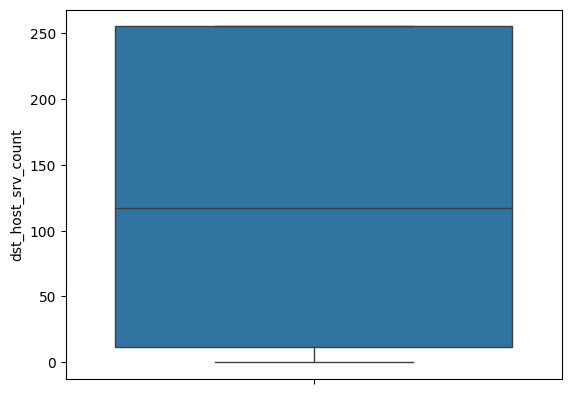

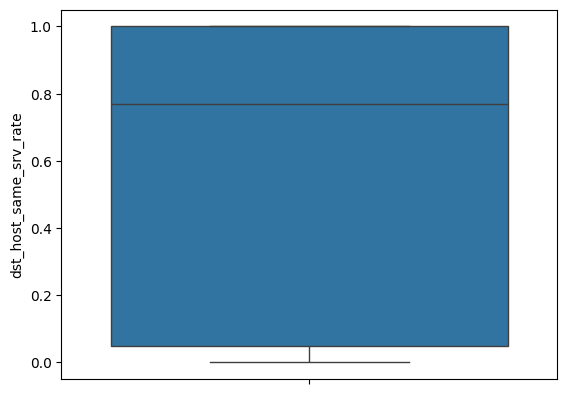

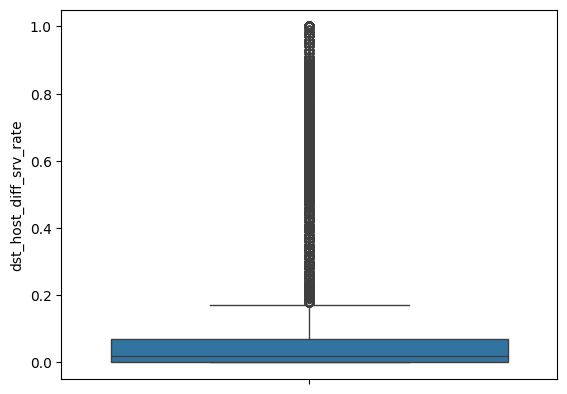

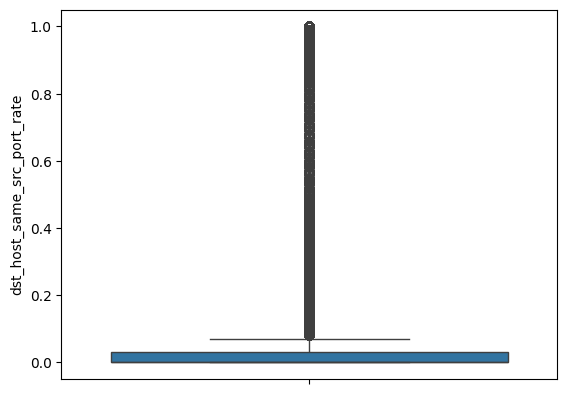

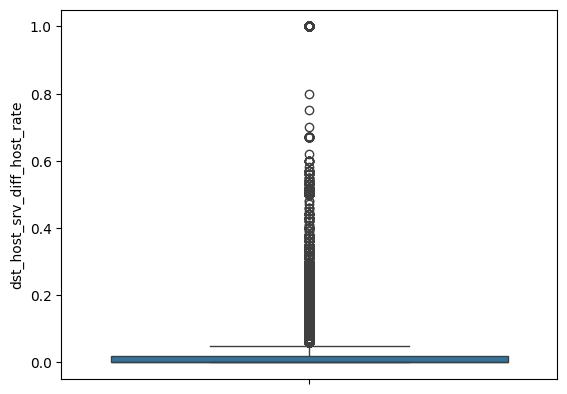

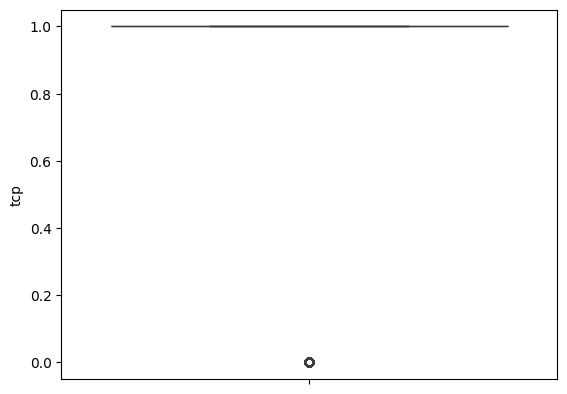

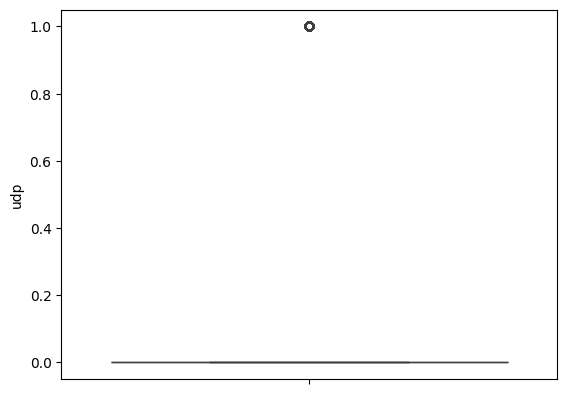

In [28]:
for i in x.columns:
  sns.boxplot(x[i])
  plt.show()

In [29]:
cols = x.columns

In [30]:
x.iloc[:, 5:45].describe()

,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,...,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
count,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,...,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000,145585.000000
mean,0.000137,0.020201,0.000048,0.100175,0.000515,0.491486,0.000378,0.000124,0.038520,0.003675,...,0.108412,0.655192,0.040576,0.093078,181.469423,129.935570,0.553226,0.061389,0.092826,0.019048
std,0.011720,0.239369,0.010150,1.426803,0.028586,0.499929,0.019433,0.014354,3.707506,0.177582,...,0.308806,0.446795,0.120396,0.241952,99.097396,114.714717,0.456236,0.147021,0.241124,0.060410
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.080000,0.000000,0.000000,78.000000,12.000000,0.050000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,255.000000,117.000000,0.770000,0.020000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.030000,0.020000
max,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,1.000000,2.000000,993.000000,28.000000,...,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
# standardize the data for SVM, because it cant handle wide range of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x[['duration', 'service', 'src_bytes', 'dst_bytes', 'dst_host_count', 'dst_host_srv_count','count','srv_count','dst_host_count','dst_host_srv_count']])

In [32]:
x[['duration', 'service', 'src_bytes', 'dst_bytes', 'dst_host_count', 'dst_host_srv_count','count','srv_count','dst_host_count','dst_host_srv_count']] = scaled_data

In [33]:
x

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,tcp,udp
0,-0.107851,-0.778629,9,-0.004293,0.042595,0,0,0,0,0,...,0.0,0.00,-1.740409,-1.054233,1.0,0.0,0.11,0.00,True,False
1,-0.107851,-0.778629,9,-0.004261,-0.039036,0,0,0,0,0,...,0.0,0.00,-1.639498,-0.967059,1.0,0.0,0.05,0.00,True,False
2,-0.107851,-0.778629,9,-0.004263,-0.025042,0,0,0,0,0,...,0.0,0.00,-1.538587,-0.879886,1.0,0.0,0.03,0.00,True,False
3,-0.107851,-0.778629,9,-0.004272,-0.025042,0,0,0,0,0,...,0.0,0.00,-1.437676,-0.792713,1.0,0.0,0.03,0.00,True,False
4,-0.107851,-0.778629,9,-0.004273,-0.013613,0,0,0,0,0,...,0.0,0.00,-1.336764,-0.705540,1.0,0.0,0.02,0.00,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,-0.107851,-0.778629,9,-0.004222,-0.016096,0,0,0,0,0,...,0.0,0.40,-0.963393,1.090225,1.0,0.0,0.01,0.05,True,False
494016,-0.107851,-0.778629,9,-0.004237,-0.009436,0,0,0,0,0,...,0.0,0.00,-1.770683,1.090225,1.0,0.0,0.17,0.05,True,False
494017,-0.107851,-0.778629,9,-0.004281,-0.027295,0,0,0,0,0,...,0.0,0.17,-1.669771,1.090225,1.0,0.0,0.06,0.05,True,False
494018,-0.107851,-0.778629,9,-0.004232,-0.027295,0,0,0,0,0,...,0.0,0.17,-1.568860,1.090225,1.0,0.0,0.04,0.05,True,False


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1000)

In [35]:
y_train.value_counts()

label
normal     70328
anomaly    46140
Name: count, dtype: int64

In [37]:
# Using grid search for getting best value for n_estimators hyper parameter
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Specify the values to try
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20]
}
clf = RandomForestClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1)
grid_search.fit(x_train, y_train)
best_n_estimators = grid_search.best_params_
best_n_estimators

{'max_depth': 20, 'n_estimators': 100}

Implement Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf.fit(x_train,y_train)
pred=clf.predict(x_test)

Sort the features based on feature importances

In [39]:
feat_array=sorted(np.c_[range(len(x_train.columns)),x_train.columns,clf.feature_importances_],reverse=True,key=lambda x:x[2])
for i in feat_array:
  print(i)

[22 'same_srv_rate' 0.2840233578950865]
[26 'dst_host_srv_count' 0.14662128323401707]
[3 'src_bytes' 0.1273458651076726]
[18 'count' 0.09618719082212955]
[4 'dst_bytes' 0.0839367664416511]
[23 'diff_srv_rate' 0.0813977189271699]
[28 'dst_host_diff_srv_rate' 0.06549519760574435]
[2 'flag' 0.02027898239209864]
[8 'hot' 0.015145468844486346]
[27 'dst_host_same_srv_rate' 0.01313898283371551]
[30 'dst_host_srv_diff_host_rate' 0.01076241985918972]
[1 'service' 0.0104056172207159]
[6 'wrong_fragment' 0.009955714163043083]
[20 'srv_serror_rate' 0.007776703300902593]
[29 'dst_host_same_src_port_rate' 0.00501461226393019]
[32 'udp' 0.00498631880665122]
[25 'dst_host_count' 0.004347141569808722]
[31 'tcp' 0.003983240188134044]
[19 'srv_count' 0.00263038133616431]
[21 'srv_rerror_rate' 0.002057815746020307]
[17 'is_guest_login' 0.0012650515629361175]
[0 'duration' 0.0009835121993966183]
[10 'logged_in' 0.0008619135141755514]
[24 'srv_diff_host_rate' 0.0007725833483419722]
[9 'num_failed_logins' 0.

Get the top features with highest importance

In [40]:
alpha=0.01
A_index=[]
B_index=[]
max_feature=0.0
for feature in feat_array:
    if feature[2]>alpha:
        A_index.append(feature[0])
        if max_feature<feature[2]:
               max_feature=feature[2]
    else:
        B_index.append(feature[0])

In [41]:
A_index # selected features

[22, 26, 3, 18, 4, 23, 28, 2, 8, 27, 30, 1]

Implement SVM by adding each neglected feature

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import precision_score,accuracy_score,recall_score
sum1=0.00
k=0
for xi in B_index:
        k+=1
        clfA = SVC(kernel='linear',C=1.0,gamma=0.2,cache_size=7000)
        clfB = SVC(kernel='linear',C=1.0,gamma=0.2,cache_size=7000)
        print("SVC initialization done");
        clfA.fit(x_train.iloc[:,A_index],y_train)
        print(str(k)," SVM on A is done........")
        clfB.fit(x_train.iloc[:,A_index+[xi]],y_train)
        print(str(k)," SVM on B is done........")
        predictA=clfA.predict(x_test.iloc[:,A_index])
        predictB=clfB.predict(x_test.iloc[:,A_index+[xi]])
        first=precision_score(y_test,predictA,average="micro")
        second=precision_score(y_test,predictB,average="micro")
        resu=second-first
        print(resu)
        if(resu>0.000000001):
          A_index.append(xi)

SVC initialization done
1  SVM on A is done........
1  SVM on B is done........
0.00728096988013871
SVC initialization done
2  SVM on A is done........
2  SVM on B is done........
0.0030566335817563406
SVC initialization done
3  SVM on A is done........
3  SVM on B is done........
0.003090977779304227
SVC initialization done
4  SVM on A is done........
4  SVM on B is done........
0.00020606518528687445
SVC initialization done
5  SVM on A is done........
5  SVM on B is done........
0.001751554074939099
SVC initialization done
6  SVM on A is done........
6  SVM on B is done........
0.0008242607411477199
SVC initialization done
7  SVM on A is done........
7  SVM on B is done........
-0.00020606518528687445
SVC initialization done
8  SVM on A is done........
8  SVM on B is done........
0.0005495071607652946
SVC initialization done
9  SVM on A is done........
9  SVM on B is done........
0.005082941237077976
SVC initialization done
10  SVM on A is done........
10  SVM on B is done........
0.

In [43]:
A_index

[22,
 26,
 3,
 18,
 4,
 23,
 28,
 2,
 8,
 27,
 30,
 1,
 6,
 20,
 29,
 32,
 25,
 31,
 21,
 17,
 0,
 10,
 9,
 14,
 15]

In [44]:
len(A_index)

25

In [45]:
clfran = SVC(kernel='linear')
clfran.fit(x_train.iloc[:,A_index],y_train)
predran=clfran.predict(x_test.iloc[:,A_index])

In [46]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predran, labels=y_test.unique())
pd.DataFrame(conf_matrix)

,0,1
0,17342,161
1,147,11467


Implement cross validation to to overcome overfitting of data

In [47]:
from sklearn.model_selection import cross_val_score
acc1 =accuracy_score(y_test,predran)
acc1

0.9894219871552701

In [48]:
acc1=cross_val_score(clfran,x_test.iloc[:,A_index],y_test,scoring='accuracy',cv=10)
acc1=np.mean(acc1)
acc1

0.9871895184427391

In [49]:
prec1 =precision_score(y_test,predran,average='micro')
prec1=cross_val_score(clfran,x_test.iloc[:,A_index],y_test,scoring='precision_weighted',cv=15)
prec1=np.mean(prec1)
print("precision: ",prec1) #Precision of RF-SVM
reca1 = recall_score(y_test,predran,average='micro')
reca1=cross_val_score(clfran,x_test.iloc[:,A_index],y_test,scoring='recall_weighted',cv=15)
reca1=np.mean(reca1) #Recall of RF-SVM
print("Recall: ",reca1)

precision:  0.9867623669198394
Recall:  0.9867087314712972


In [50]:
A_index

[22,
 26,
 3,
 18,
 4,
 23,
 28,
 2,
 8,
 27,
 30,
 1,
 6,
 20,
 29,
 32,
 25,
 31,
 21,
 17,
 0,
 10,
 9,
 14,
 15]